# PROBLEM STATEMENT:- 

GIVE NEWS FROM USA POLITICAL ISSUES PREDICT WHEATHER THE NEWS IS FAKE OR REAL

# TECHINQUE USED

      -  Text pre-processing techniques
      -  NLP Techniques ( TF-iDF, Bag-of-words)
      -  Logistic Regression
      -  Evaluation metrics and confusion matrix

In [48]:
import sklearn.linear_model as sk
import numpy as np # linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import os
from wordcloud import WordCloud, STOPWORDS 
import re
import nltk

In [49]:
#Loading the test and train data using pandas
train=pd.read_csv('./fake-news/train.csv')
test=pd.read_csv('./fake-news/test.csv')

In [50]:
#Printing the shape of data
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [51]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


=====================================================================================================================
The "Title" column contain the title of the news 
The "author" column contain the name of the author of the news
The "text" column contain the detial information of news
The "label" column contain the the label "1" or "0" if label is "1" then news is correct else news is fake.
The "Total" column contain the merger of this all information excluding the label



In [52]:
#Checking the null value in the csv
print(train.isnull().sum())
print("----------------")
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
----------------
id          0
title     122
author    503
text        7
dtype: int64


In [53]:
#Here we are using pandas fillna to replace missing value by the space.
test=test.fillna(' ')
train=train.fillna(' ')

#Here we are merging all three column into "Title " "author " and "text" because to work with text data i am 
#agregating all text data into one column.

test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

# Creating Wordcloud Visuals

In [54]:
#To save time instead of going throughout the file we create a word-cloud. This is done from library WordCloud

true_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file  and merging all the token into one string whose label is equal to 1 (real news)
#and creating wordcloud of it
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    # joining the token in single string 
    true_words += " ".join(tokens)+" "
    
print(tokens)
#iterate through the csv file  and merging all the token into one string whose label is equal to 0 (fake news)
#and creating wordcloud of it
for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    # joining the token in single string  
    fake_words += " ".join(tokens)+" "

['what', 'keeps', 'the', 'f-35', 'alive', 'david', 'swanson', 'david', 'swanson', 'is', 'an', 'author,', 'activist,', 'journalist,', 'and', 'radio', 'host.', 'he', 'is', 'a', '2015', 'nobel', 'peace', 'prize', 'nominee.', 'he', 'is', 'director', 'of', 'worldbeyondwar.com', 'and', 'campaign', 'coordinator', 'for', 'rootsaction.org', '.', 'he', 'hosts', 'talk', 'nation', 'radio', '.', 'talk', 'nation', 'radio', 'is', 'on', 'vt', 'radio', 'and', 'is', 'syndicated', 'by', 'pacifica', 'network.', 'the', 'show', 'also', 'airs', 'on', 'wtju,', 'charlottesville,', 'va;', 'wcsx-detroit,', 'mi;', 'kghi,', 'westport,', 'wa;', 'whus,', 'storrs,', 'ct;', 'wprr,', 'grand', 'rapids,', 'mi;', 'krfp-lp,', 'moscow,', 'id;', 'kzgm,', 'cabool,', 'mo;', 'kmud,', 'garberville,', 'ca;', 'wazu,', 'peoria,', 'il;', 'wxrd,', 'crown', 'point,', 'in;', 'geneva', 'radio,', 'geneva,', 'ny;', 'kkrn,', 'round', 'mountain,', 'ca;', 'kskq-lp,', 'ashland,', 'or;', 'wuow-lp,', 'oneonta,', 'ny;', 'no', 'lies', 'radio,', '

In [55]:
print(true_words[0:1000000])

house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it darrell lucushouse dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus on october 30, 2016 subscribe jason chaffetz on the stump in american fork, utah ( image courtesy michael jolley, available under a creative commons-by license) with apologies to keith olbermann, there is no doubt who the worst person in the world is this week–fbi director james comey. but according to a house democratic aide, it looks like we also know who the second-worst person is as well. it turns out that when comey sent his now-infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton’s email server, the ranking democrats on the relevant committees didn’t hear about it from comey. they found out via a tweet from one of the republican committee chairmen. as we now know, comey notified the republican chairmen and democratic ranking members of the 

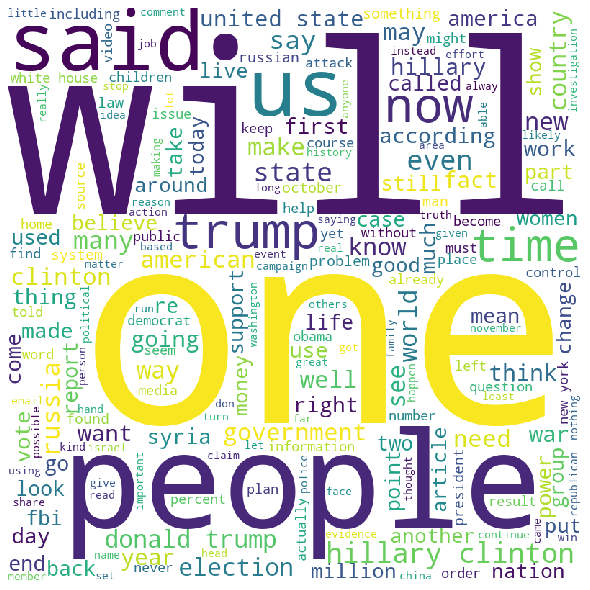

In [56]:
#displaying the image of the word-cloud of the real news word

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(true_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

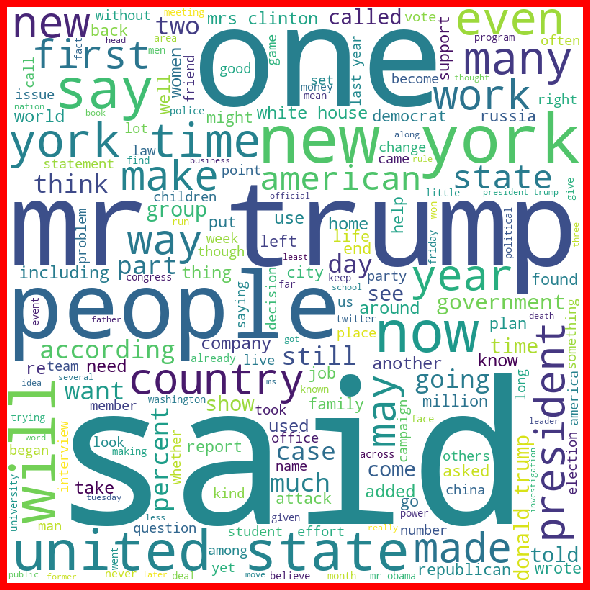

In [57]:
#displaying the image of the word-cloud of the fake news word


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = 'red') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing Using 

# 1. Regex (Removing puncutation marks)

# 2. Tokenization

# 3. StopWords

# 4. Lemmatization

In [58]:
#Downloading nltk data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yadavrupeshmohanlal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yadavrupeshmohanlal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
from nltk.corpus import stopwords

In [60]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [61]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [62]:
# removing the not word from stop word becuse a not can completly change the meaning of sentence
#Eg:- "The apple is not good" after removing "not" "The apple is good".
stop_words.remove('not')

In [63]:
#As mention above above removing the negation words from the stop word.
remove_ele=[]
s="n't"
for w in stop_words:
    if s in w:
        remove_ele.append(w)
        stop_words.remove(w)

In [64]:
print(remove_ele)

["don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"]


In [65]:
#Here we using lemitization technique to find the root word for given word eg:-"playing " will change to play
lemmatizer=WordNetLemmatizer()
for i,r in train.iterrows():
    filter_sentence = ''
    
    # Here we are using regex technique for cleaing data using punctuation marks 
    sentence = r['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    #Here we are spliting sentence into token using Word Tokenization and appending it into list this process 
    #is called tokenization
    words = nltk.word_tokenize(sentence) #tokenization
    
    #Removing unnecessary or stop words.
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[i,'total'] = filter_sentence

# Applying NLP Techniques using 1. Bag-of-words / CountVectorizer  2.TF-iDF Vectorizer

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
X_train = train['total']
Y_train = train['label']

# Feature extraction using count vectorization and tf-idf.


In [68]:
#bag of word is used here to create a dictionary were each word will hold a postion in dictionary and it will assign  
#a frequency to the word.
#the Bag-of-words model is mainly used as a tool of feature generation.

count_vectorizer = CountVectorizer()
#Here we will convert the bag of word to vector .
count_vectorizer.fit_transform(X_train)



<20800x220387 sparse matrix of type '<class 'numpy.int64'>'
	with 6000520 stored elements in Compressed Sparse Row format>

=====================================================================================================================
Here we are using tf-idf techinque 

Tf-idf is a measure of originality of a word by comparing the number of times a word appear in document with the number of document the word appear in.

TF means term frequency part 
IDF = inverse document frequency

Formula :
         TF-IDF= TF(t,d)*IDF(t)
         
         here TF(t,d) means Number of times term "t" appear in doc "d"
         
         IDF(t)= log(1+no of document/1+df(d,t))+1
         
         df(d,t) mean "document frequency of term t.
         

In [69]:
# here we are applying the tf-idf technique

freq_term_matrix = count_vectorizer.transform(X_train)#count vectoriser
tfidf = TfidfTransformer(norm="l2")#APPLYING TF-IDF
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)#SPARES MATRIX

In [70]:
print(tf_idf_matrix)

  (0, 193339)	0.014250456037216768
  (0, 192918)	0.04798387166232176
  (0, 192788)	0.009512989464106824
  (0, 191427)	0.043215538455339444
  (0, 191415)	0.06964348229058094
  (0, 191271)	0.03682371004195268
  (0, 191184)	0.012956085194141521
  (0, 190482)	0.01603097079905253
  (0, 190280)	0.05870461464497614
  (0, 189112)	0.014843485055385627
  (0, 189028)	0.020604052162432277
  (0, 188795)	0.01669725890780815
  (0, 188537)	0.012189703941481387
  (0, 188393)	0.03290023296810974
  (0, 188266)	0.05870461464497614
  (0, 188009)	0.023342063047993418
  (0, 187910)	0.011530533612526669
  (0, 186479)	0.027851809216579638
  (0, 186446)	0.02107390872714717
  (0, 186373)	0.016564227170396385
  (0, 184878)	0.02107390872714717
  (0, 182981)	0.06431842846684796
  (0, 182075)	0.05649018740776426
  (0, 181755)	0.03386279116206841
  (0, 181390)	0.017126027526931195
  :	:
  (20799, 11097)	0.020367948759798325
  (20799, 11093)	0.0257901222261835
  (20799, 11007)	0.03031665193429411
  (20799, 10917)	0.03

In [71]:
print(tf_idf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01378485 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Modellling

In [72]:
#Applying transform on test data because once we build model we are going to predit result for test data.
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [73]:
print(X_train.shape,X_test.shape)

(15600, 220387) (5200, 220387)


In [74]:
print(y_train.shape,y_test.shape)

(15600,) (5200,)


# Logistic regression

The Logistic regression creates non-linearity in the model.
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary
dependent variable.
In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression).
This is used for classification.
This works with curve

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:

LG = LogisticRegression(C=1e5)# regularization parameter lower it is better the model works. it avoid overfitting
LG.fit(X_train, y_train)#fitting the model
prediction = LG.predict(X_test)#predicting on x_test.
Train_data_prediction=LG.score(X_train, y_train)
Test_data_prediction=LG.score(X_test, y_test)



print('Accuracy of logistic classifier on training set: {:.2f}'
     .format(Train_data_prediction))
print('Accuracy of logistic classifier on test set: {:.2f}'
     .format(Test_data_prediction))


/Users/yadavrupeshmohanlal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic classifier on training set: 1.00
Accuracy of logistic classifier on test set: 0.98


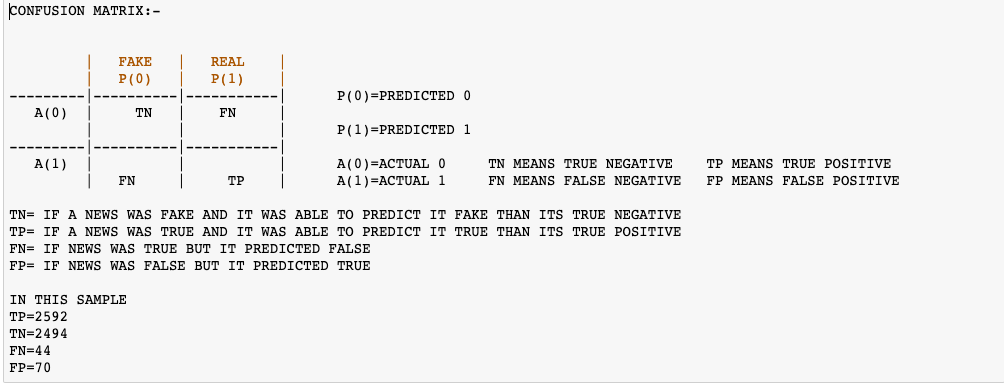

In [77]:
from IPython.display import Image
Image(filename='./image/cm.png') 

In [78]:
#confusion matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[2494,   70],
       [  44, 2592]])

In [79]:
Accuracy=(cm[0][0]+cm[1][1])/(cm[0][1]+cm[0][0]+cm[1][0]+cm[1][1])
#(2494+2592)/(2494+2592+70+44)#Auuracy prediction
print("Accuracy is using logistic regression on test data :-",Accuracy)

Accuracy is using logistic regression on test data :- 0.9780769230769231


In [80]:
from sklearn.metrics import classification_report

# Deployment Pipeline

In [ ]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [ ]:
pipeline.fit(X_train, Y_train)# Training Data 

In [ ]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

In [ ]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

In [ ]:
filename = './pipeline.sav'

# Result

In [112]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
result


array([0])